## US Medical Insurance Project

This project aims to uncover the most significant factors for yearly US Medical insurance costs based on the provided dataset. It does not suggest any insight beyond that scope. 

### The Analysis Plan

#### Data Exploration and Cleaning
Here we check for any missing values and handle them accordingly. We will also summarize the data to understand distrubitions relationships.

#### Feature Analysis
Following on, we being to look at the correlation between different features and the charges. Visualizations will be useful here. 

#### Modeling 
Regression models will help identify the most significant factors affecting the insurance costs. We will evaluate the model's performance with metrics such as R-squared and Mean Absolute Error. 

#### Presentation
We will create useful visuals and summary reports to present the findings. 

### Importing Necessary Libraries

In [2]:
import csv as csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Exploration and Cleaning

In [3]:
#setting the file path of the data, may be different on github, but will be in the repo
insurance_csv = 'insurance.csv'

#checking for missing data and getting a summary of the data
insurance_data = pd.read_csv(insurance_csv)
missing_values = insurance_data.isnull().sum()

# Summarize the data
summary_stats = insurance_data.describe(include='all')

missing_values, summary_stats

(age         0
 sex         0
 bmi         0
 children    0
 smoker      0
 region      0
 charges     0
 dtype: int64,
                 age   sex          bmi     children smoker     region  \
 count   1338.000000  1338  1338.000000  1338.000000   1338       1338   
 unique          NaN     2          NaN          NaN      2          4   
 top             NaN  male          NaN          NaN     no  southeast   
 freq            NaN   676          NaN          NaN   1064        364   
 mean      39.207025   NaN    30.663397     1.094918    NaN        NaN   
 std       14.049960   NaN     6.098187     1.205493    NaN        NaN   
 min       18.000000   NaN    15.960000     0.000000    NaN        NaN   
 25%       27.000000   NaN    26.296250     0.000000    NaN        NaN   
 50%       39.000000   NaN    30.400000     1.000000    NaN        NaN   
 75%       51.000000   NaN    34.693750     2.000000    NaN        NaN   
 max       64.000000   NaN    53.130000     5.000000    NaN       

In [4]:
# Display the first few rows of the dataset
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Missing Data
This dataset is clean and does not require us to address missing data beyond the recognition that there may be additional factors such as occupation, family medical history, and more that could also affect medical costs. This dataset does not outline these potential factors, but they may be worthy of additional study.

#### Summary
Here is the high level summary of this dataset's features.

- Total number of patients: 1338.
- Age: Ranges from 18 to 64. 
    - Calculated Average Age: 39.
- Sex: Two categories defined here, Male and Female.
- BMI: Ranges from 15.96 to 53.13.
    - Calculated Average BMI: ~30.66.
- Children: Range from 0 to 5. 
    - Calculated Average Children: ~1.09.
- Smoker: Two categories, yes and no.
    - Majority non-smokers, already noticing a pattern of higher cost associated with smokers.
- Region: Four regions, "southwest", "southeast", "northwest", "northeast".
    - Majority in "southeast".
- Charges: Medical charges ranging 1,121.87USD to 63,770.43USD.
    - Calculated Average Costs: 13,270.42USD.

In [5]:
#Creating empty lists for features in insurance.csv
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

### Correlation Analysis

A correlation matrix might be a a good way to start to understand this data too. This would show the relationship between numerical features and the insurance charges. 

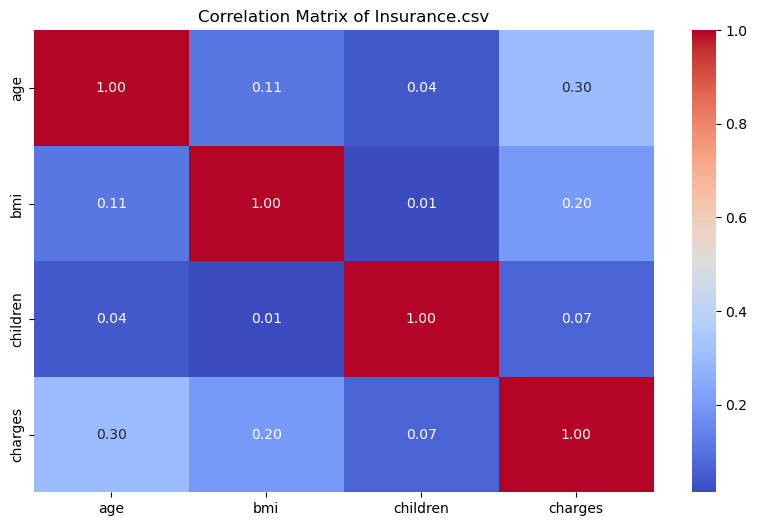

In [8]:
#making the matrix
correlation_matrix = insurance_data.corr(numeric_only=True)

#making a heatmap visualization of the matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Insurance.csv')
plt.show()


Here we can see a positive correlation between charges, BMI and age. There is not much of a correlation for children affecting charges. 

Smoking is binary in this set and doesn't show on the matrix, the same is true of sex. 

### More Visualizations 
Scatter plots can be more helpful in learning about how those binary attributes can affect charges (including other key features). 

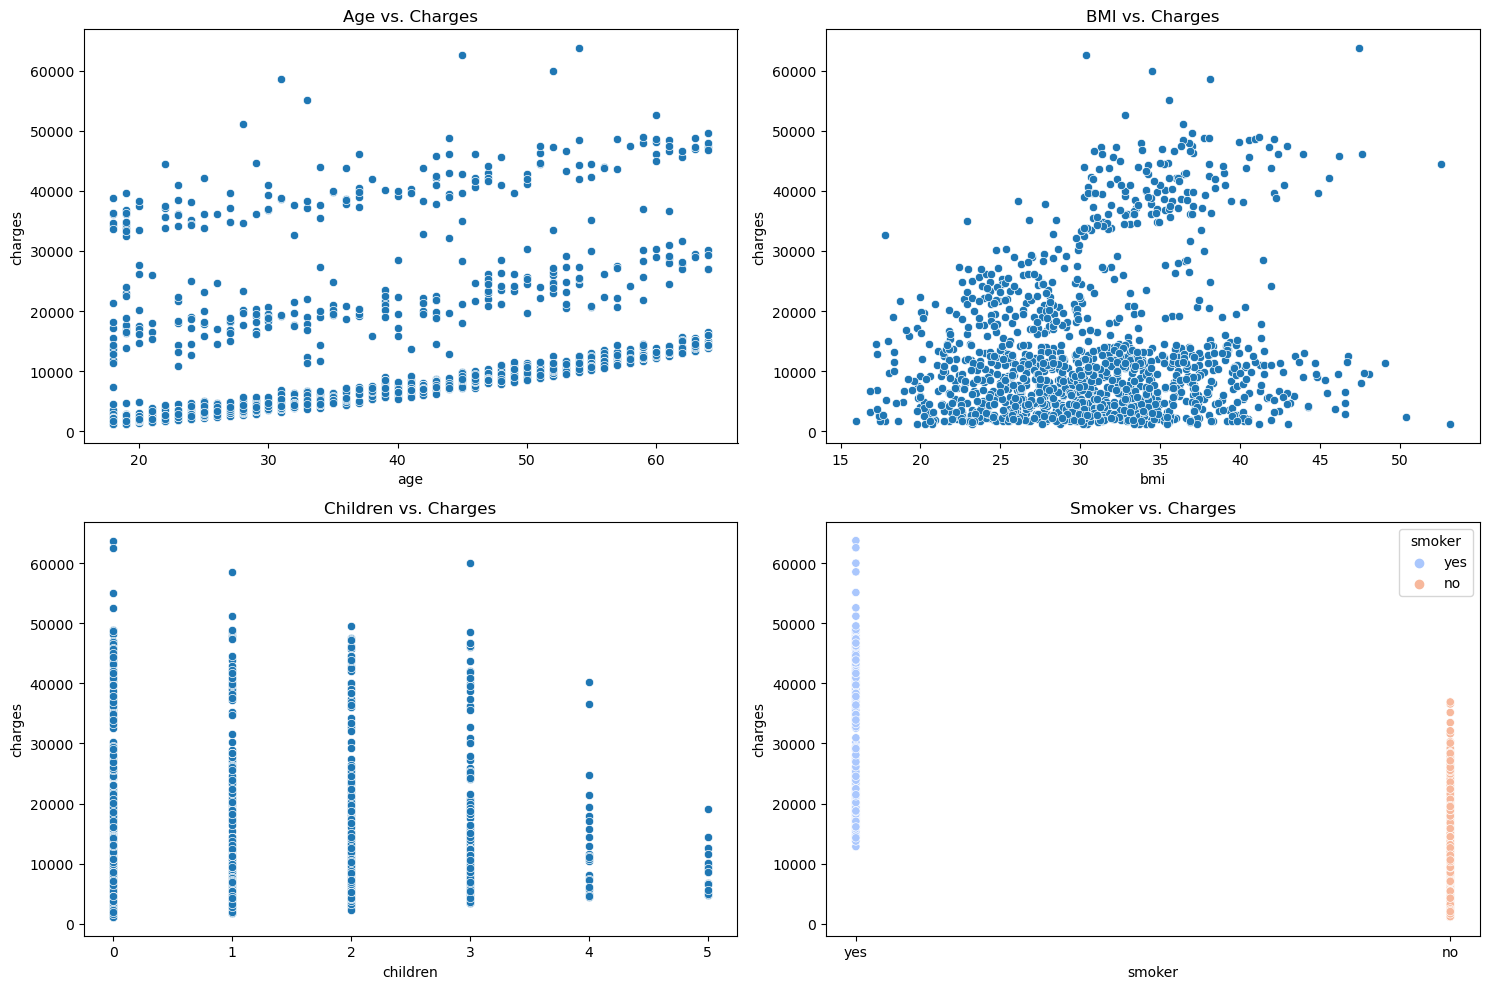

In [10]:
# Create scatter plots for visual exploration

plt.figure(figsize=(15, 10))

# Scatter plot for Age vs. Charges
plt.subplot(2, 2, 1)
sns.scatterplot(data=insurance_data, x='age', y='charges')
plt.title('Age vs. Charges')

# Scatter plot for BMI vs. Charges
plt.subplot(2, 2, 2)
sns.scatterplot(data=insurance_data, x='bmi', y='charges')
plt.title('BMI vs. Charges')

# Scatter plot for Children vs. Charges
plt.subplot(2, 2, 3)
sns.scatterplot(data=insurance_data, x='children', y='charges')
plt.title('Children vs. Charges')

# Scatter plot for Smoker vs. Charges
plt.subplot(2, 2, 4)
sns.scatterplot(data=insurance_data, x='smoker', y='charges', hue='smoker', palette='coolwarm')
plt.title('Smoker vs. Charges')

plt.tight_layout()
plt.show()

These plots provide insight and help inform our next steps: 
- Age vs Charges: There is a slight uptrend between these two, it suggests that charges increase with age.
- BMI vs Charges: higher BMI tends to translate into higher charges.
- Children vs Charges: like our correlation matrix, but clearer, children do have a slight impact on insurance costs.
- Smoker vs Charges: This is the clearest indication of impact we've seen. Smokers have significantly higher charges than non-smokers. 

### Regression Analysis

We need to encode `sex`, `smoker`, and `region` into numerical values for our regression analysis. 

In [13]:
# Encode categorical variables
encoded_data = insurance_data.copy()
encoded_data['sex'] = encoded_data['sex'].map({'male': 0, 'female': 1})
encoded_data['smoker'] = encoded_data['smoker'].map({'no': 0, 'yes': 1})
encoded_data = pd.get_dummies(encoded_data, columns=['region'])

# Display the first few rows of the encoded data
encoded_data.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


We will split the data into features (X) and target (Y) then perform linear regression to identify the significant factors that affect charges. 

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Split the data into features (X) and target (y)
X = encoded_data.drop(columns=['charges'])
y = encoded_data['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Coefficients of the model
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])

#return Mean Absolute Value, R2, and Coefficients
mae, r2, coefficients

(4181.194473753643,
 0.7835929767120722,
                    Coefficient
 age                 256.975706
 sex                  18.591692
 bmi                 337.092552
 children            425.278784
 smoker            23651.128856
 region_northeast    459.585244
 region_northwest     88.907918
 region_southeast   -198.279052
 region_southwest   -350.214110)

Our output suggests a few things. 

- Our R-squared suggests that approximately 78% of the insurance data can be explained by this model. 
- Being a smoker is _THE_ highest impact onf higher insurance charges, increasing them by 23,652.13USD a year on average.
- BMI and Children are the next highest impact, followed by age.
- Sex does not appear to be a large factor.

Let's visualize actual charges vs the model's predicted charges to make it a bit easier to understand. 

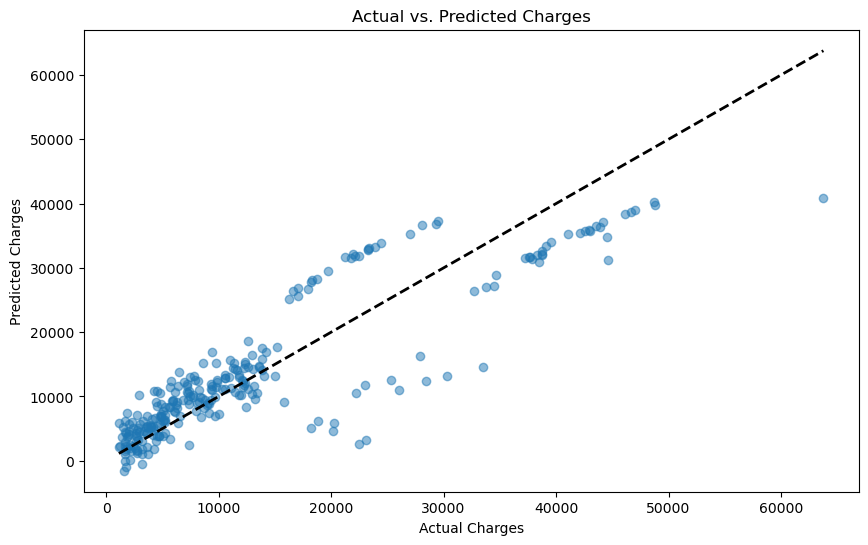

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.show()

We can see in the above that actual vs predicted insurance changes are fairly accurate. We also notice an outlier that could possibly be removed in any revisitation of this analysis. 

### Conclusion

In this project we sought to identify the key factors that have outsized influence on insurance costs in the `insurance.csv` dataset. This dataset included the features: age, sex, BMI, number of children, smoker status, region, and charges. 

#### Key Findings
- **Smoker status** was the *most significant* factor with smokers having an increased charge by 23,651.13USD yearly on average.
- Each unit increase in **BMI** raises charges by 337.09USD yearly.
- Each additional year of **age** increases charges by 256.98USD yearly.

### Next Steps for Further Investigation
- We can refine the models by exploring different algorithms and feature engineering. 
- We can analyze outliers and determine if we should explore those further or disregard them from the analysis.
- We can better present findings, tailored to the audience in question. 